# Model Training Practice

In this practical task, we will consolidate in practice how to train models in tensorflow on synthetic data. In the tasks below, it is necessary to obtain an accuracy above 90%. We advise you not to give up on this - it is really possible to get 100% everywhere. And in the last task, you can get bonus points for a model with a minimum number of parameters.

In [1]:
import tensorflow as tf
import numpy as np
#tf.enable_eager_execution()
print(tf.__version__)
from tensorflow.keras.layers import Dense

2.9.2


In [2]:
#@title
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, Normalize
from sklearn.metrics import accuracy_score


%matplotlib inline
np.random.seed(10)

colors = ['red', "blue"]
labels_cmap = ListedColormap(colors, 2)
colors = [(1, 0, 0), (1, 1, 1), (0, 0, 1)]  # R -> W -> B
main_cmap = LinearSegmentedColormap.from_list("main_scheme", colors, N=300)

def show_data(X, y):
    plt.figure(figsize=(5, 5))
    plt.scatter(X[:, 0], X[:, 1], s=120, color=labels_cmap(y))
    

def show_descision_boundary(clf, limits, binary=False, X=None, y=None, n_lines=10, show_lines=False,
                           figsize=(5, 5), ax=None):
    if limits is None:
        if X is not None:
            xs = [X[:, 0].min() - .3, X[:, 0].max() + .3]
            ys = [X[:, 1].min() - .3, X[:, 1].max() + .3]
        else:
            xs = [-1, 1]
            ys = [-1, 1]
    else:
        xs, ys = limits
    
    x_min, x_max = xs
    y_min, y_max = ys
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    if ax is None:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(1, 1, 1)
    
    if binary:
        Z = clf.predict(np.c_[xx.ravel(), xx.ravel()])
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        norm = Normalize(vmin=0.,vmax=1.)
    else:
        Z = clf(np.c_[xx.ravel(), xx.ravel()])
        Z = clf(np.c_[xx.ravel(), yy.ravel()])
        #if clf.prob_output:
        #    norm = Normalize(vmin=0.,vmax=1.)
        #else:
        norm = Normalize(vmin=-10.,vmax=10., clip=True)
        Z = Z.numpy() 
    
    Z = Z.reshape(xx.shape)
    Z = Z.astype(np.float32)
    
    ax.contourf(xx, yy, Z, n_lines, alpha=0.4, cmap=main_cmap, norm=norm)
    if show_lines:
        cp = ax.contour(xx, yy, Z, n_lines)
        ax.clabel(cp, inline=True, 
              fontsize=10, colors="green")
    
    if y is not None:
        X = np.array(X)
        y = np.array(y)
        ax.scatter(X[:, 0], X[:, 1], s=120, color=labels_cmap(y),
                   zorder=4)
        

def eval_model(model, X, y):
    accuracy = model.evaluate(X, y)[1]
    if accuracy == 1.0:
        print("Perfect!")
    elif  accuracy > 0.9:
        print("Well done! Can you make 100%?")
    else:
        print("Don't give up!")
    return accuracy

**1a**. Let's start with the classic XOR problem.

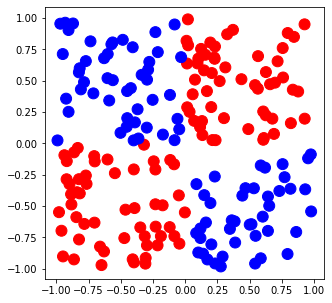

In [4]:
X = np.random.rand(200, 2) - 0.5
y = ((X[:, 0] < 0) ^ (X[:, 1] < 0))
X = X*2
show_data(X, y)


In [8]:
model = tf.keras.Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid' ))
model.add(Dense(4))
model.add(Dense(1))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"]) 
history = model.fit(X, y, epochs=200, verbose=1, batch_size=64, shuffle=True)

Epoch 1/200
2/2 [==============================] - 1s 7ms/step - loss: 0.6969 - accuracy: 0.5000
Epoch 2/200
2/2 [==============================] - 0s 7ms/step - loss: 0.6598 - accuracy: 0.5000
Epoch 3/200
2/2 [==============================] - 0s 8ms/step - loss: 0.6306 - accuracy: 0.5000
Epoch 4/200
2/2 [==============================] - 0s 7ms/step - loss: 0.5879 - accuracy: 0.5600
Epoch 5/200
2/2 [==============================] - 0s 7ms/step - loss: 0.5374 - accuracy: 0.7600
Epoch 6/200
2/2 [==============================] - 0s 7ms/step - loss: 0.4769 - accuracy: 0.8400
Epoch 7/200
2/2 [==============================] - 0s 12ms/step - loss: 0.4142 - accuracy: 0.8500
Epoch 8/200
2/2 [==============================] - 0s 8ms/step - loss: 0.3628 - accuracy: 0.8300
Epoch 9/200
2/2 [==============================] - 0s 8ms/step - loss: 0.3353 - accuracy: 0.8400
Epoch 10/200
2/2 [==============================] - 0s 8ms/step - loss: 0.3225 - accuracy: 0.8400
Epoch 11/200
2/2 [==========

7/7 [==============================] - 0s 3ms/step - loss: 0.0113 - accuracy: 1.0000
Perfect!


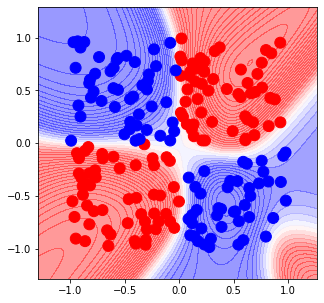

In [6]:
limits = [[-0.6, 0.6], [-0.6, 0.6]]
eval_model(model, X, y)
show_descision_boundary(limits=None, clf=model, binary=False,
                                X=X,
                                y=y, 
                                n_lines=50,
                                show_lines=False)

**1b**

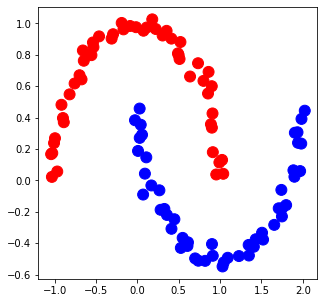

In [10]:
from sklearn.datasets import make_moons

X, y = make_moons(noise=0.04)
show_data(X, y)

In [20]:
model = tf.keras.Sequential()
model.add(Dense(4, input_shape=(2,), activation='relu'))
model.add(Dense(4))
model.add(Dense(1))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"]) 
history = model.fit(X, y, epochs=200, verbose=1, batch_size=64, shuffle=True)

Epoch 1/200
2/2 [==============================] - 2s 16ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 2/200
2/2 [==============================] - 0s 10ms/step - loss: 0.6651 - accuracy: 0.5100
Epoch 3/200
2/2 [==============================] - 0s 8ms/step - loss: 0.6426 - accuracy: 0.5800
Epoch 4/200
2/2 [==============================] - 0s 13ms/step - loss: 0.6219 - accuracy: 0.7200
Epoch 5/200
2/2 [==============================] - 0s 14ms/step - loss: 0.5997 - accuracy: 0.7900
Epoch 6/200
2/2 [==============================] - 0s 11ms/step - loss: 0.5787 - accuracy: 0.8100
Epoch 7/200
2/2 [==============================] - 0s 10ms/step - loss: 0.5584 - accuracy: 0.8000
Epoch 8/200
2/2 [==============================] - 0s 12ms/step - loss: 0.5388 - accuracy: 0.8100
Epoch 9/200
2/2 [==============================] - 0s 13ms/step - loss: 0.5202 - accuracy: 0.8100
Epoch 10/200
2/2 [==============================] - 0s 14ms/step - loss: 0.4996 - accuracy: 0.8100
Epoch 11/200
2/2 [==

4/4 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000
Perfect!


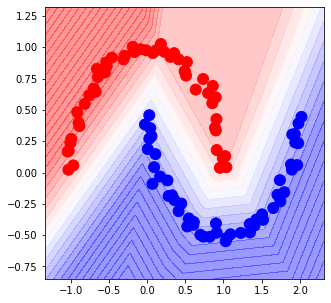

In [21]:
eval_model(model, X, y)
show_descision_boundary(limits=None, clf=model, binary=False,
                                X=X,
                                y=y, 
                                n_lines=50,
                                show_lines=False)

**1c**

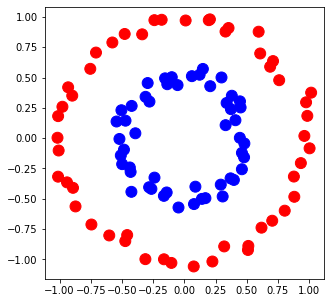

In [22]:
from sklearn.datasets import make_circles

X, y = make_circles(factor=0.5, noise=0.05)
show_data(X, y)

In [23]:
model = tf.keras.Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid' ))
model.add(Dense(1))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"]) 
history = model.fit(X, y, epochs=200, verbose=1, batch_size=64, shuffle=True)

Epoch 1/200
2/2 [==============================] - 0s 9ms/step - loss: 0.6957 - accuracy: 0.5000
Epoch 2/200
2/2 [==============================] - 0s 9ms/step - loss: 0.7002 - accuracy: 0.5000
Epoch 3/200
2/2 [==============================] - 0s 8ms/step - loss: 0.6973 - accuracy: 0.5000
Epoch 4/200
2/2 [==============================] - 0s 11ms/step - loss: 0.6960 - accuracy: 0.5000
Epoch 5/200
2/2 [==============================] - 0s 8ms/step - loss: 0.6958 - accuracy: 0.5000
Epoch 6/200
2/2 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 7/200
2/2 [==============================] - 0s 11ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 8/200
2/2 [==============================] - 0s 8ms/step - loss: 0.6940 - accuracy: 0.5000
Epoch 9/200
2/2 [==============================] - 0s 8ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 10/200
2/2 [==============================] - 0s 8ms/step - loss: 0.6948 - accuracy: 0.5000
Epoch 11/200
2/2 [=========

4/4 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 1.0000
Perfect!
Bonus points!


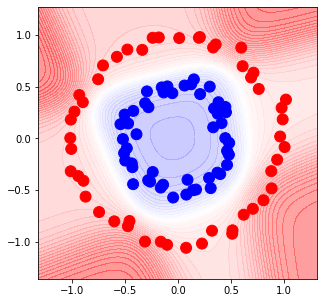

In [24]:
accuracy = eval_model(model, X, y)
if model.count_params() < 18 and accuracy == 1.0:
    print("Bonus points!")
else:
    print(f"Model has {model.count_params()} parameters")

show_descision_boundary(limits=None, clf=model, binary=False,
                                X=X,
                                y=y, 
                                n_lines=50,
                                show_lines=False)